In [1]:
from SOView import *
import shutil
import os
import gc
from scipy import sparse
import pandas as pd

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/tqdm-4.64.1-py3.9.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.2 numpy==1.23.3 scipy==1.9.1 pandas==1.5.0 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6
squidpy==1.1.2


In [2]:
path = '/home/yzy/PUBDT/st/spacetx/raw/DARTFISH'

# first data

In [31]:
raw_pd = pd.read_csv(f'{path}/human_frontal_cortex1.csv')

In [32]:
raw_pd = raw_pd.set_index('Unnamed: 0')

In [33]:
raw_pd

,x,y,x_um,y_um,ABCC9,ACOT11,ADCY8,ADRA2A,ADTRP,AHRR,...,VAV2,VAV3,VIP,VIPR2,VSTM2L,ZFHX3,ZNF385D,ZNF703,ZNF804B,Total
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
c1,25.331373,682.156131,3.647718,98.230483,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
c2,118.971887,518.579801,17.131952,74.675491,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
c3,211.368144,541.345605,30.437013,77.953767,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
c4,298.179546,903.456818,42.937855,130.097782,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
c5,363.757742,861.540117,52.381115,124.061777,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c1031,35216.371370,566.587269,5071.157477,81.588567,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25.0
c1032,35242.417520,266.529673,5074.908123,38.380273,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
c1033,35246.706070,958.168365,5075.525674,137.976245,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [34]:
var_names = raw_pd.columns[4:-1]

In [35]:
obs_names = raw_pd.index

In [36]:
X = raw_pd.iloc[:,4:-1].values

In [37]:
raw_pd[['x_um','y_um']].values

array([[3.64771773e+00, 9.82304828e+01],
       [1.71319517e+01, 7.46754913e+01],
       [3.04370128e+01, 7.79537671e+01],
       ...,
       [5.07552567e+03, 1.37976245e+02],
       [5.07594999e+03, 1.25856137e+02],
       [5.07859746e+03, 6.18288161e+01]])

In [38]:
adata = ad.AnnData(X=X)
adata.obs_names = obs_names
adata.var_names = var_names
adata.obsm['spatial'] = raw_pd[['x_um','y_um']].values

/tmp/ipykernel_1149791/37808337.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=X)


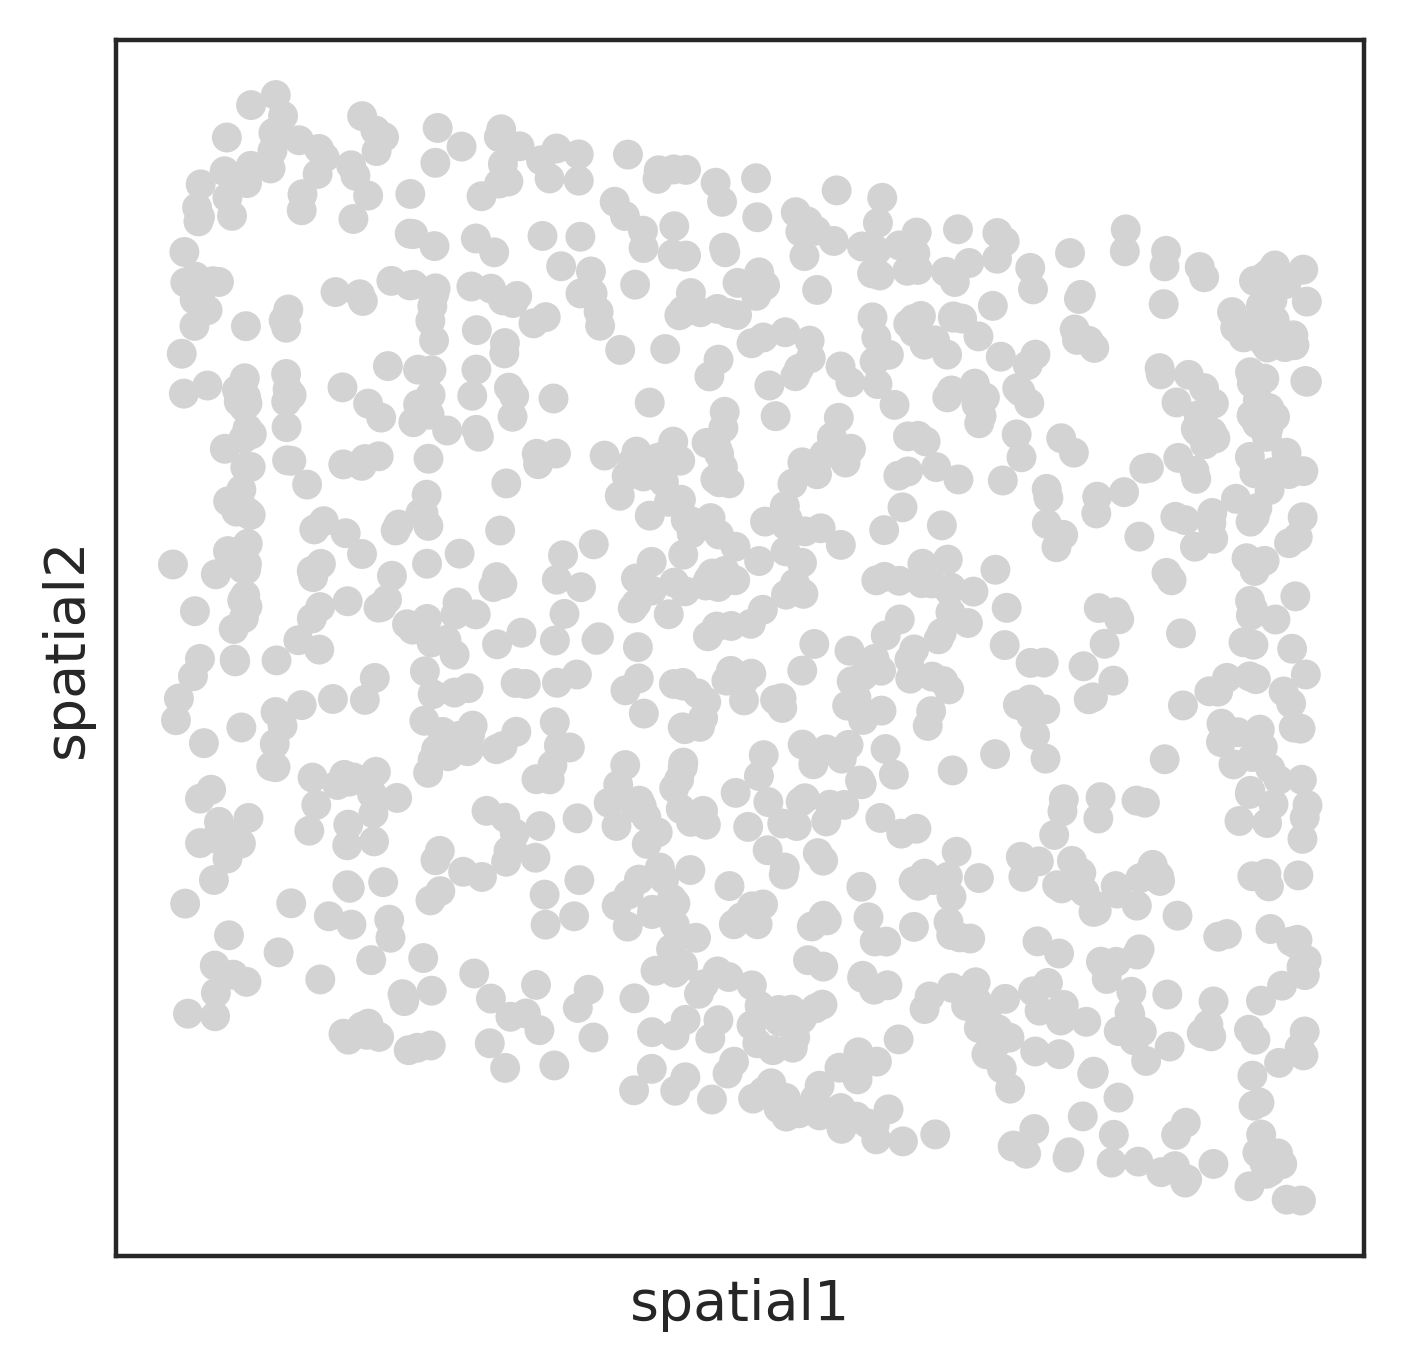

In [39]:
sc.pl.embedding(adata,basis='spatial')

In [40]:
adata.write_h5ad(f'{path}/human_frontal_cortex1.h5ad')

# second data

In [20]:
raw_pd = pd.read_csv(f'{path}/human_occipital_cortex.csv')

In [21]:
raw_pd = raw_pd.set_index('Unnamed: 0')

In [23]:
raw_pd

,x,y,x_um,y_um,ABCC9,ABO,ACOT11,ADAMTS2,ADAMTSL1,ADCY8,...,VAV2,VAV3,VIP,VIPR2,VSTM2L,ZC3H12A,ZFHX3,ZNF385D,ZNF804B,Total
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
c1,13.012245,11.063265,1.873763,1.593110,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
c2,17.541333,1734.602667,2.525952,249.782784,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
c3,19.175429,389.442169,2.761262,56.079672,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
c4,23.135272,772.317320,3.331479,111.213694,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
c5,23.344076,733.981991,3.361547,105.693407,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c782,1196.468779,31698.243340,172.291504,4564.547041,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
c783,1198.779961,34227.928710,172.624314,4928.821734,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
c784,1204.589595,32252.887860,173.460902,4644.415852,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0


In [24]:
var_names = raw_pd.columns[4:-1]

In [25]:
obs_names = raw_pd.index

In [26]:
X = raw_pd.iloc[:,4:-1].values

In [27]:
raw_pd[['x_um','y_um']].values

array([[1.87376327e+00, 1.59311020e+00],
       [2.52595200e+00, 2.49782784e+02],
       [2.76126176e+00, 5.60796724e+01],
       ...,
       [1.73460902e+02, 4.64441585e+03],
       [1.74227031e+02, 4.97821911e+03],
       [1.74971650e+02, 4.90592683e+03]])

In [28]:
adata = ad.AnnData(X=X)
adata.obs_names = obs_names
adata.var_names = var_names
adata.obsm['spatial'] = raw_pd[['x_um','y_um']].values

/tmp/ipykernel_1149791/37808337.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=X)


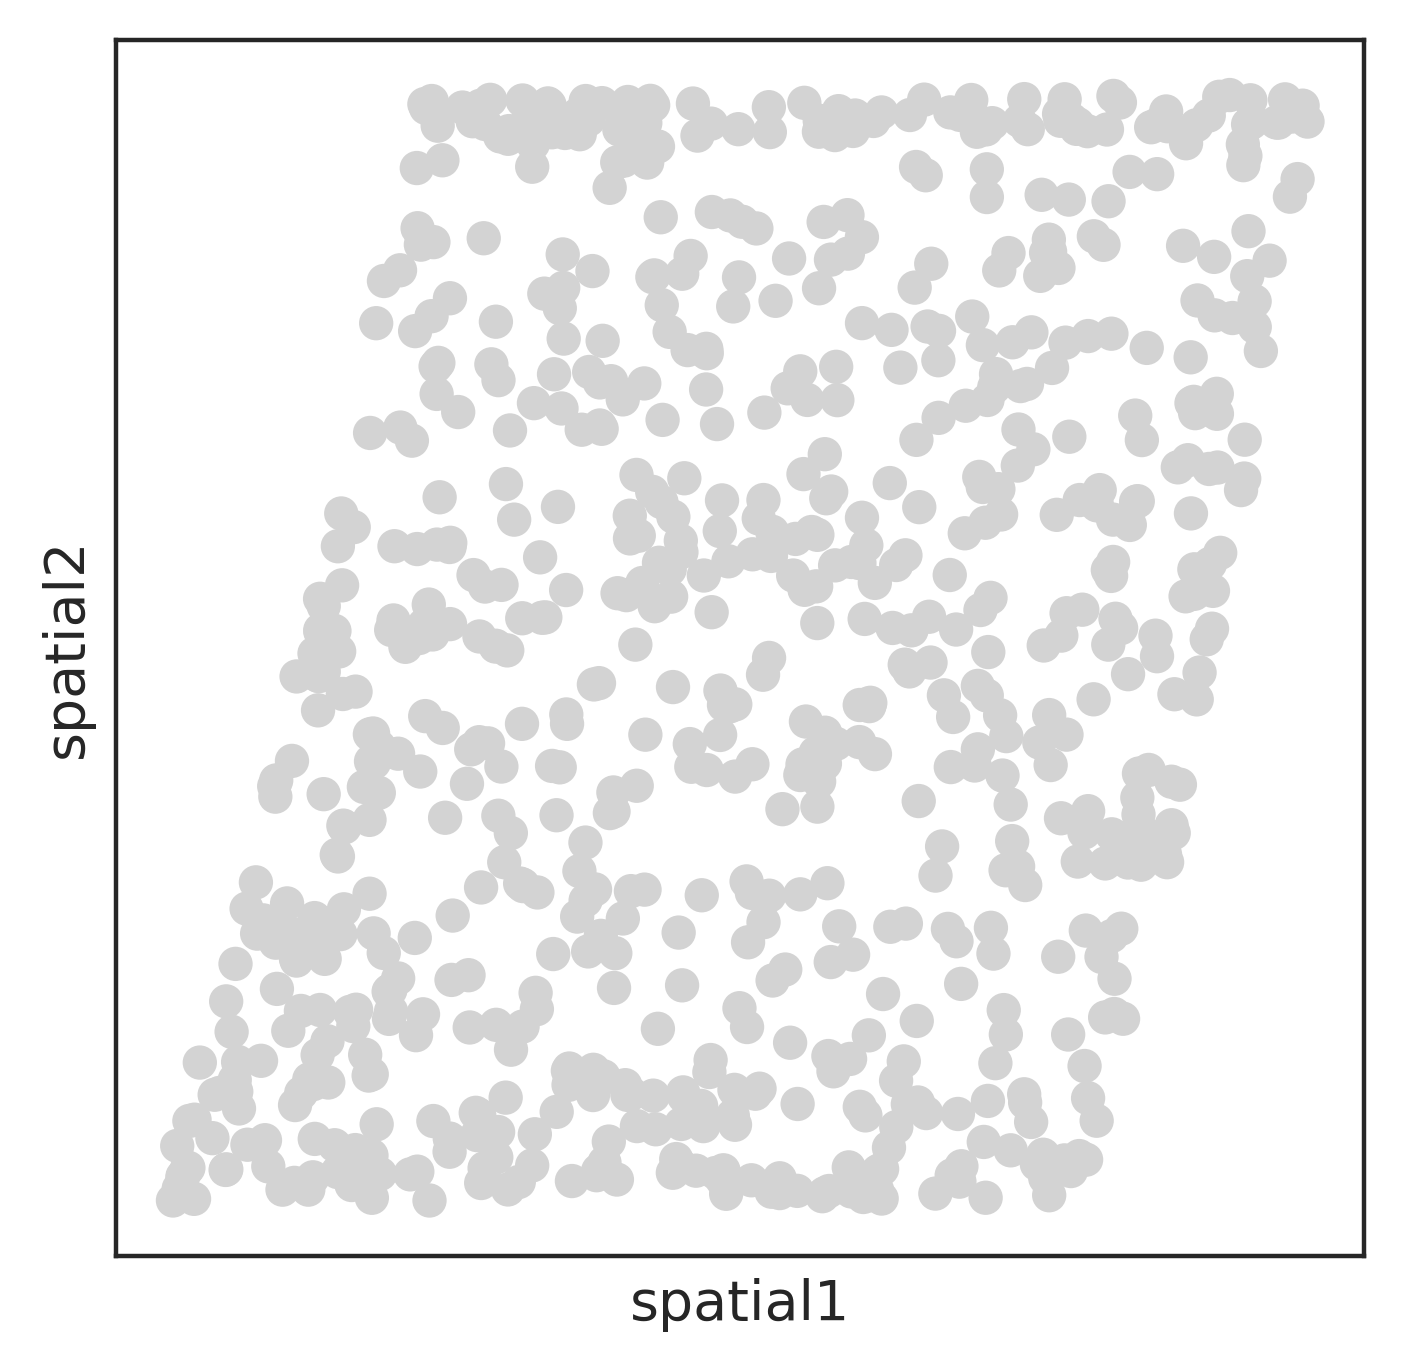

In [29]:
sc.pl.embedding(adata,basis='spatial')

In [30]:
adata.write_h5ad(f'{path}/human_occipital_cortex.h5ad')

# third data

In [41]:
raw_pd = pd.read_csv(f'{path}/mouse.csv')

In [42]:
raw_pd = raw_pd.set_index('Unnamed: 0')

In [43]:
raw_pd

,3110035E14Rik,Actr1b,Adarb2,Adcy2,Adra1b,AI593442,Ak5,Alcam,Aldoc,Ank1,...,Vstm2l,Wasf1,Wls,Wsb2,Zcchc12,Zwint,x,y,x_um,y_um
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,22.0,7634.0,3.168,1099.296
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,6381.0,4.320,918.864
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,42.0,4261.0,6.048,613.584
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,3818.0,7.200,549.792
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,51.0,4084.0,7.344,588.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1952.0,4001.0,281.088,576.144
627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1952.0,2816.0,281.088,405.504
628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1962.0,49.0,282.528,7.056


In [44]:
var_names = raw_pd.columns[:-4]

In [45]:
var_names

Index(['3110035E14Rik', 'Actr1b', 'Adarb2', 'Adcy2', 'Adra1b', 'AI593442',
       'Ak5', 'Alcam', 'Aldoc', 'Ank1',
       ...
       'Vip', 'Vsnl1', 'Vstm2a', 'Vstm2b', 'Vstm2l', 'Wasf1', 'Wls', 'Wsb2',
       'Zcchc12', 'Zwint'],
      dtype='object', length=380)

In [46]:
obs_names = raw_pd.index

In [47]:
X = raw_pd.iloc[:,:-4].values

In [48]:
raw_pd[['x_um','y_um']].values

array([[   3.168, 1099.296],
       [   4.32 ,  918.864],
       [   6.048,  613.584],
       ...,
       [ 282.528,    7.056],
       [ 282.816,   84.816],
       [ 282.816,  410.4  ]])

In [49]:
adata = ad.AnnData(X=X)
adata.obs_names = obs_names
adata.var_names = var_names
adata.obsm['spatial'] = raw_pd[['x_um','y_um']].values

/tmp/ipykernel_1149791/37808337.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=X)
/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


In [50]:
adata

AnnData object with n_obs × n_vars = 631 × 380
    obsm: 'spatial'

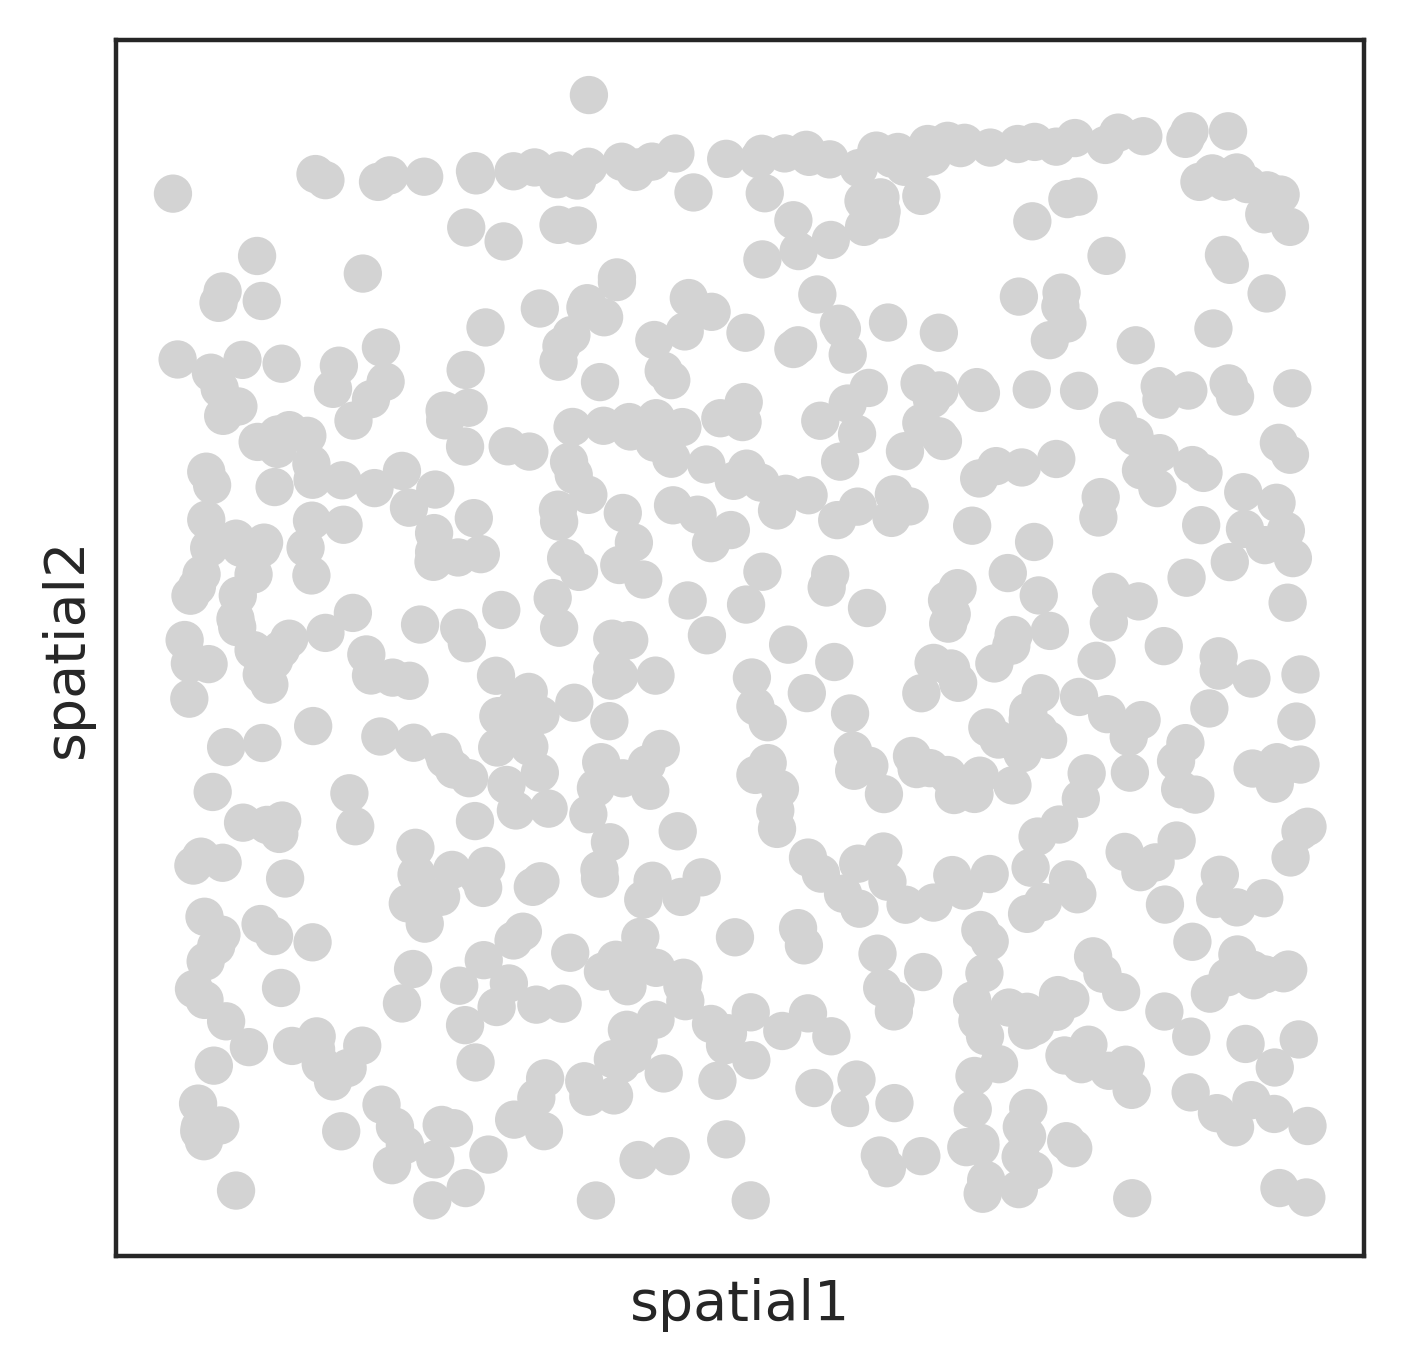

In [51]:
sc.pl.embedding(adata,basis='spatial')

In [54]:
adata.write_h5ad(f'{path}/mouse_cortex.h5ad')